## Importation des libraries et du Drive

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_dir = "D:/ising/data/data/"


# Première Analyse des données

### Données à Température fixée

In [3]:
def read_t(t,root="./", str_check=False):
  if not str_check :
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
  else :
    data = pickle.load(open(root+f'Ising2DFM_reSample_L40_T={t}.pkl','rb'))
  return np.unpackbits(data).astype(int).reshape(-1,1600)

### Analyse du fichier de données totale

In [4]:
data_all = read_t("2.25", file_dir, True)
data_label = pickle.load(open(file_dir+f'Ising2DFM_reSample_L40_T=2.25.pkl','rb'))
data_all.shape
data_label = np.array([2.25]*len(data_all))

### Concatenation des données et Creation des Labels

# CNN
## Preprocessing

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU,UpSampling2D, CategoryEncoding, Reshape, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [6]:
mean_val = data_all.reshape(data_all.shape[0], 40*40).mean(axis=1)
data_all = data_all.astype(np.uint8)

data_all[mean_val > 0.5] = np.invert(data_all[mean_val > 0.5])//255
data_all.shape

(10000, 1600)

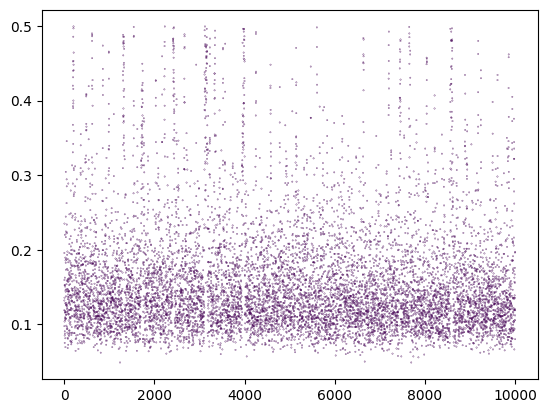

In [7]:
plt.scatter(range(data_all.shape[0]), data_all.reshape(data_all.shape[0], 40*40).mean(axis=1), s=0.05,c =data_label)

In [8]:
tot_data_cnn = data_all.reshape(data_all.shape[0],1600)

tot_data_cnn = tot_data_cnn.reshape(data_all.shape[0], 40, 40, 1)


X_train, X_test, y_train, y_test = train_test_split(tot_data_cnn, data_label, test_size=0.2, random_state=42)


In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## modèle

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv1D, MaxPooling2D, Flatten, Dense, Dropout, ReLU,UpSampling2D, CategoryEncoding, Reshape, Lambda,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [171]:
import tensorflow as tf
from tensorflow.keras import layers, Model
 

class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            
            layers.Input(shape=(40, 40, 1)),
            layers.Conv2D(5, (7, 7), activation='relu', padding='same'),
            layers.Conv2D(5, (3, 3),padding='same', activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(5, (3, 3),padding='same', activation='relu'),
            layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
            layers.Conv2D(1, (5, 5), activation='relu', padding='same'),

        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Input(shape=(5, 5, 1)),
            layers.UpSampling2D((2,2), interpolation = 'nearest'),
            layers.Conv2D(5, (5, 5),padding='same', activation='relu'),
            layers.UpSampling2D((2,2), interpolation = 'nearest'),
            layers.Conv2D(3, (3, 3),padding='same', activation='relu'),
            layers.UpSampling2D((2,2), interpolation = 'nearest'),
            layers.Conv2D(3, (5, 5),padding='same', activation='relu'),
            layers.Conv2D(1, (3, 3),padding='same', activation='relu'),

        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()


# Compile the model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')


In [172]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=264,
                  validation_split=0.2)#,workers=max_workers,use_multiprocessing = True)

Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 0.5688 - val_loss: 0.4471
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.4343 - val_loss: 0.4174
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.4111 - val_loss: 0.3998
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.3961 - val_loss: 0.3874
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.3852 - val_loss: 0.3785
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.3769 - val_loss: 0.3712
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 0.3706 - val_loss: 0.3657
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 0.3801 - val_loss: 0.3749
Epoch 9/100
25/25 [==============================] - 0s 13ms/step - loss: 0.3714 - val_loss: 0.3641
Epoch 10/100
25/25 [==============================] - 0s 12ms/step - loss: 0.3642 - val_loss: 0.3602

In [177]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

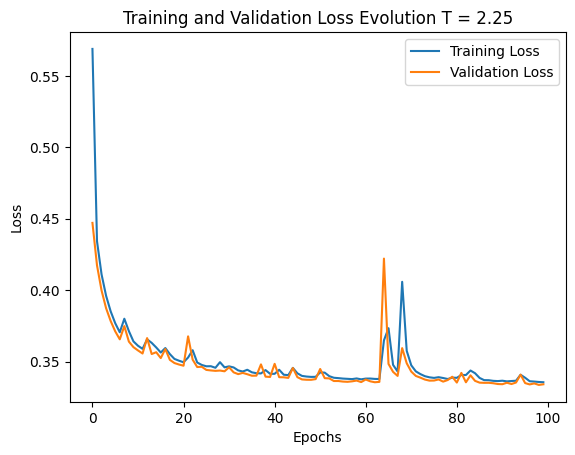

In [199]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Evolution T = 2.25')
plt.savefig('D:/ising/encoc.jpg',dpi=300)

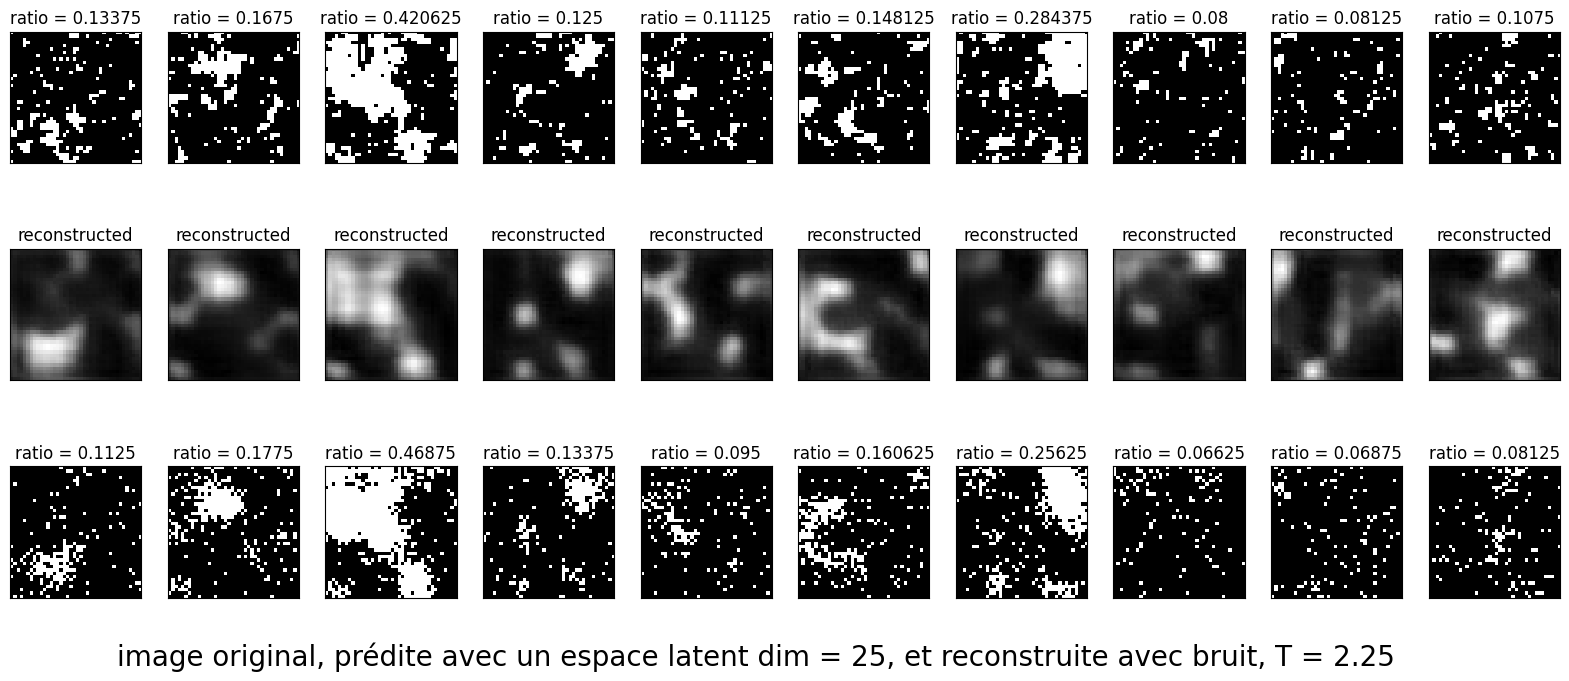

In [228]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    img = np.copy(decoded_imgs[i])
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("ratio = {}".format(np.sum(X_test[i].reshape(1600))/1600))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    img= 2*np.random.normal(0.2,0.15,1600) + 1.5*img.reshape(1600) + 6*np.random.normal(-0.1,0.02,1600)
    img[img<=0.45]=0
    img[img>0.45]=1
    img = img.reshape(40,40)
    plt.imshow(img)
    plt.title("ratio = {}".format(np.sum(img.reshape(1600))/1600))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.text(-400,60,'image original, prédite avec un espace latent dim = 25, et reconstruite avec bruit, T = 2.25',size = 20)
plt.savefig('D:/ising/triple.jpg',dpi=300)
plt.show()


In [180]:
X_test.shape

(2000, 40, 40, 1)

In [181]:
encoded_imgs.shape

(2000, 5, 5, 1)

In [182]:
autoencoder.encoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 40, 40, 5)         250       
                                                                 
 conv2d_59 (Conv2D)          (None, 40, 40, 5)         230       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 20, 20, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 20, 20, 5)         230       
                                                                 
 conv2d_61 (Conv2D)          (None, 20, 20, 15)        690       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 15)       0         
 g2D)                                                 

In [183]:
autoencoder.decoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_18 (UpSamplin  (None, 10, 10, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 10, 10, 5)         130       
                                                                 
 up_sampling2d_19 (UpSamplin  (None, 20, 20, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 20, 20, 3)         138       
                                                                 
 up_sampling2d_20 (UpSamplin  (None, 40, 40, 3)        0         
 g2D)                                                            
                                                      

In [236]:
encoded_imgs1 = autoencoder.encoder(X_train).numpy()
encoded_imgs1.shape

(8000, 5, 5, 1)

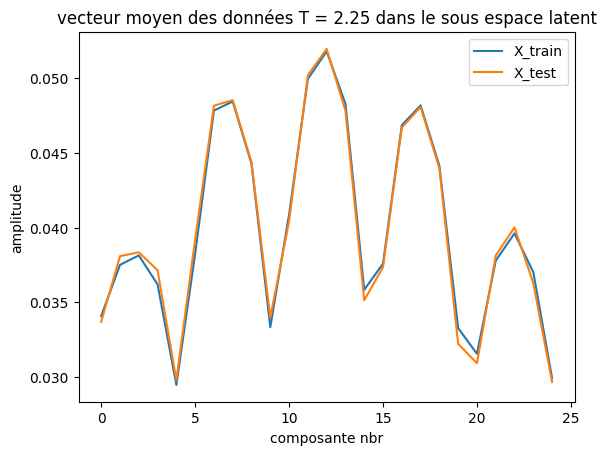

In [237]:
vec1 = np.sum(encoded_imgs1.reshape(np.shape(encoded_imgs1)[0],25),axis=0)
plt.plot(range(25),vec1/np.sum(vec1),label='X_train')
plt.plot(range(25),vec/np.sum(vec),label='X_test')
plt.xlabel('composante nbr')
plt.ylabel('amplitude')
plt.legend()
plt.title('vecteur moyen des données T = 2.25 dans le sous espace latent')
plt.savefig('D:/ising/latent.jpg',dpi=300)